当我们用平均增长率来描述数据时，实际上假定了该数据在一段时间以来以固定的趋势增长。趋势大致分为3种：增长，下降，平稳。

假设理想情况下，某数据的年增长率为k%，如10%。

现实中，各种因素会对趋势造成扰动，使得每年的实际增长率不等于k%，如8%,11%,等等。

我们假定理想的平均增长率能够较好地拟合历史数据。下面就通过实验来测试增长率的算数平均和几何平均的合理性，即这两种平均对数据的拟合程度。

我们首先定义函数，来构造一组数据。

假设100元购买了某理财产品N年。该理财产品的年增长率在k%左右浮动，扰动的最大幅度为delta.

例如，k=10, delta=2，则每年的增长率可能为8%, 9%, 10%, 11%, 12%.

那么，这N年的投资净值可以用以下函数计算：

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def make_data(k, delta, N):
    money_first_year = 100
    money_every_year = np.zeros(N+1, dtype=np.float32)
    rate_every_year = np.zeros(N)
    money_every_year[0] = money_first_year
    for i in range(N):
        rate_i = k + np.random.uniform(-delta, delta)
        money_every_year[i + 1] = money_every_year[i] * (1 + rate_i / 100)
        rate_every_year[i] = rate_i/100
    
    print('各年的增长率：', np.around(rate_every_year * 100, 2))
    print('各年的净值：', np.around(money_every_year, 2))
    return money_every_year, rate_every_year

例如理想增长率为10%，每年的波动幅度为±5%，我们生成20年的数据如下：

各年的增长率： [ 9.24 13.36 11.88  7.33  9.58 14.18 12.69 11.84  5.18  8.29 12.64  9.19
 13.17 13.35  6.35 12.36 13.87 14.96  8.49 13.77]
各年的净值： [100.   109.24 123.84 138.54 148.7  162.95 186.06 209.66 234.48 246.62
 267.05 300.8  328.46 371.72 421.33 448.07 503.46 573.3  659.07 715.04
 813.51]


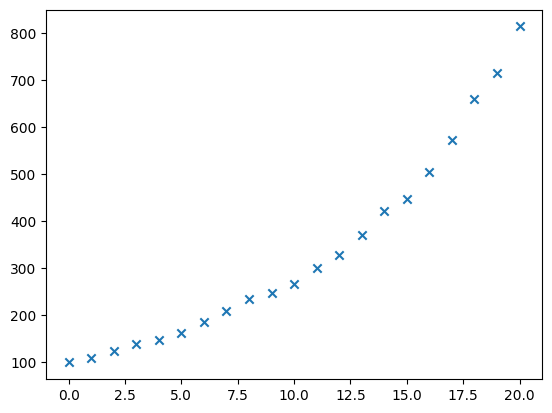

In [5]:
money_20years, rate_20years = make_data(k=10, delta=5, N=20)

year_indexes = np.arange(21)
plt.scatter(year_indexes, money_20years, marker='x')

我们计算一下各年增长率的算数平均值和几何平均值，并用这两种平均增长率画出相应的增长曲线。

算数平均增长率： 11.09
几何平均增长率： 11.05


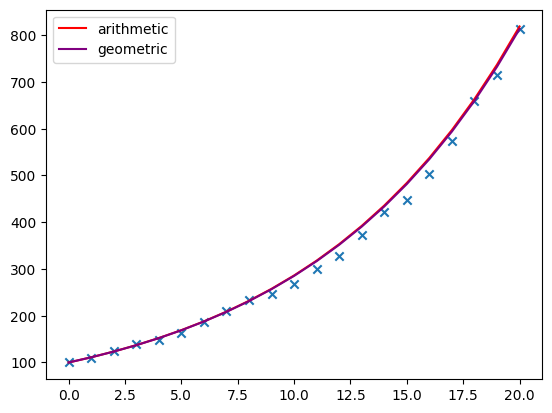

In [6]:
rate_arithmetic_mean = rate_20years.mean()
rate_geometric_mean = (1+rate_20years).prod()**(1/20) - 1
print('算数平均增长率：', np.around(rate_arithmetic_mean * 100, 2))
print('几何平均增长率：', np.around(rate_geometric_mean * 100, 2))

money_20years_arith = 100 * np.power((1+rate_arithmetic_mean), np.arange(21))
money_20years_geome = 100 * np.power((1+rate_geometric_mean), np.arange(21))
plt.scatter(year_indexes, money_20years, marker='x')
plt.plot(year_indexes, money_20years_arith, color='red', label='arithmetic')
plt.plot(year_indexes, money_20years_geome, color='purple', label='geometric')
plt.legend()
plt.show()

对上述例子，看不出明显区别。

下面的代码块可以改变中心增长率k0, 扰动幅度delta0，年数N0来观察拟合情况。

当我们增大delta0和N0时，就能发现使用几何平均率是对实际增长更好的拟合。

各年的增长率： [ 4.79 28.14 21.95 -2.53  3.61 18.01 26.57 12.31 20.94 25.43 13.13 20.39
 -9.48 28.54 -7.15 19.21 16.3  -5.83 18.5   0.74  4.16  2.85 24.15 -6.97
 24.27 27.65 29.18 15.2  14.6   3.66  2.96 -1.19 -5.06  7.51  1.95 25.42
 14.99 -8.51 -0.63 25.71 21.88 14.6  28.37 23.53 19.6  -9.47 23.32 -7.55
 12.8  10.33  5.29 -3.71  5.4  21.3  23.47  2.07 16.88  2.46 23.96 -1.26
 14.76 -2.23 -7.06 14.46  5.03 12.79 -8.47  8.52 -9.48 19.65 10.01 -8.
 25.21 16.18 20.23 26.44 10.64 14.54  0.78  4.75 19.   26.03  7.   21.29
 28.89 19.94  8.64 15.02 -1.95 28.26  9.03 -3.02  2.58 10.19 21.79 20.96
 -6.17 28.01  2.12 -6.07]
各年的净值： [1.0000000e+02 1.0479000e+02 1.3428000e+02 1.6375999e+02 1.5962000e+02
 1.6539000e+02 1.9519000e+02 2.4705000e+02 2.7745999e+02 3.3557001e+02
 4.2089999e+02 4.7617001e+02 5.7327002e+02 5.1895001e+02 6.6707001e+02
 6.1935999e+02 7.3835999e+02 8.5872998e+02 8.0867999e+02 9.5825000e+02
 9.6533002e+02 1.0055300e+03 1.0342200e+03 1.2839700e+03 1.1944600e+03
 1.4843900e+03 1.89487

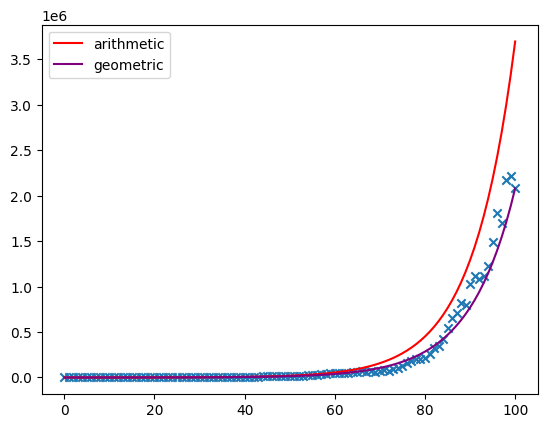

In [7]:
k0 = 10
delta0 = 20
N0=100
money_n_years, rate_n_years = make_data(k=k0, delta=delta0, N=N0)

rate_arithmetic_mean = rate_n_years.mean()
rate_geometric_mean = (1+rate_n_years).prod()**(1/N0) - 1
print('算数平均增长率：', np.around(rate_arithmetic_mean * 100, 2))
print('几何平均增长率：', np.around(rate_geometric_mean * 100, 2))

year_indexes = np.arange(N0+1)
money_n_years_arith = 100 * np.power((1+rate_arithmetic_mean), np.arange(N0+1))
money_n_years_geome = 100 * np.power((1+rate_geometric_mean), np.arange(N0+1))
plt.scatter(year_indexes, money_n_years, marker='x')
plt.plot(year_indexes, money_n_years_arith, color='red', label='arithmetic')
plt.plot(year_indexes, money_n_years_geome, color='purple', label='geometric')
plt.legend()
plt.show()